<a href="https://colab.research.google.com/github/aditya9049/Electric-Vehicle-EDA/blob/main/EDA_Vechicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('dataset.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
df.columns=df.columns.str.strip()
df.columns=df.columns.str.replace(' ', '_')

In [ ]:
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN_(1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal_Code                                        112634 non-null  int64  
 5   Model_Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric_Vehicle_Type                              112634 non-null  object

In [ ]:
pd.options.display.float_format='{:.0f}'.format
df.describe()

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,2020_Census_Tract
count,112634,112634,112634,112634,112348,112634,112634
mean,98156,2019,88,1793,30,199456680,52966495754
std,2649,3,102,10784,15,93984270,1699104500
min,1730,1997,0,0,1,4777,1101001400
25%,98052,2017,0,0,18,148414150,53033008500
50%,98119,2020,32,0,34,192389624,53033029305
75%,98370,2022,208,0,43,219189880,53053072506
max,99701,2023,337,845000,49,479254772,56033000100


In [ ]:
df.isnull().sum()

,0
VIN_(1-10),0
County,0
City,0
State,0
Postal_Code,0
Model_Year,0
Make,0
Model,20
Electric_Vehicle_Type,0
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,0


<Axes: >

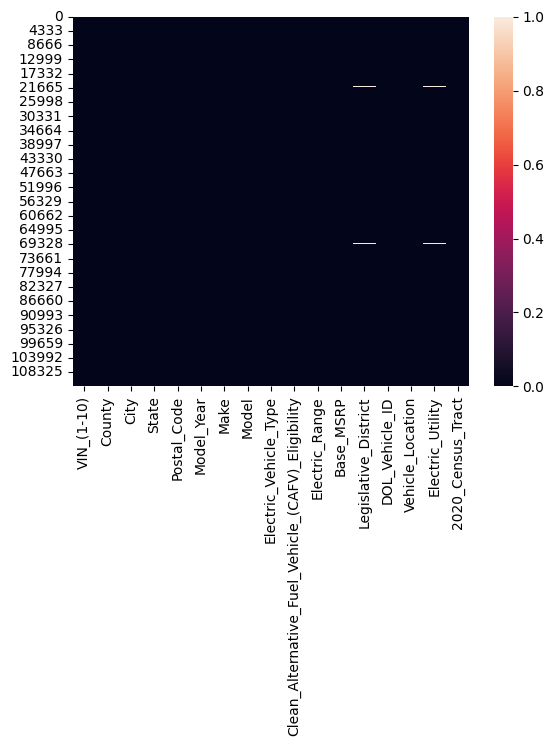

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.Model.value_counts().reset_index().head()

,Model,count
0,MODEL 3,23135
1,MODEL Y,17142
2,LEAF,12880
3,MODEL S,7377
4,BOLT EV,4910


In [ ]:
df.Legislative_District.value_counts().reset_index().head()

,Legislative_District,count
0,41,7605
1,45,7112
2,48,6462
3,36,5251
4,46,4723


In [ ]:
df.Vehicle_Location.value_counts().reset_index().head()

,Vehicle_Location,count
0,POINT (-122.13158 47.67858),2916
1,POINT (-122.2066 47.67887),2059
2,POINT (-122.1872 47.61001),2001
3,POINT (-122.31765 47.70013),1880
4,POINT (-122.12096 47.55584),1852


In [ ]:
df.Electric_Utility.value_counts().reset_index().head()

,Electric_Utility,count
0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),40247
1,PUGET SOUND ENERGY INC,22172
2,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),21447
3,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,6522
4,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5053


In [ ]:
df.Model=df.Model.fillna(df.Model.mode()[0])
df.Legislative_District=df.Legislative_District.fillna(df.Legislative_District.mean())
df.Vehicle_Location=df.Vehicle_Location.fillna(df.Vehicle_Location.mode()[0])
df.Electric_Utility=df.Electric_Utility.fillna(df.Electric_Utility.mode()[0])

In [ ]:
df.isnull().sum()

,0
VIN_(1-10),0
County,0
City,0
State,0
Postal_Code,0
Model_Year,0
Make,0
Model,0
Electric_Vehicle_Type,0
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,0


<Axes: >

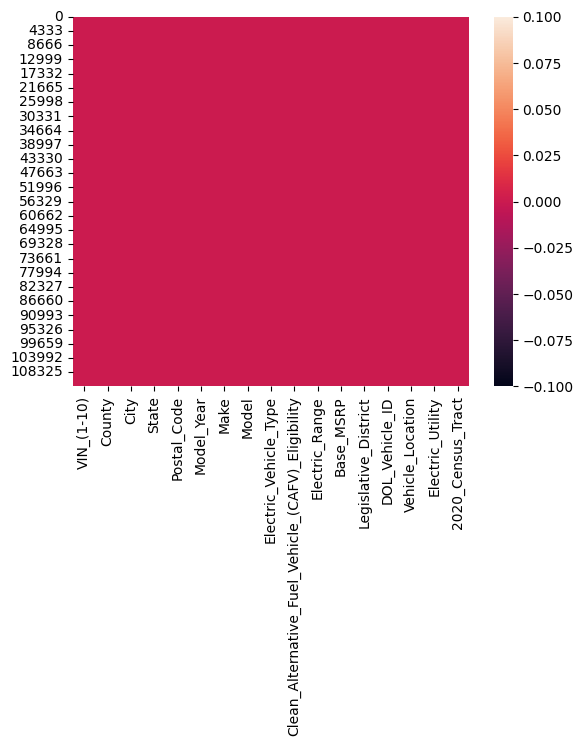

In [ ]:
sns.heatmap(df.isnull())

**UNIVARIANT **

In [ ]:
discrete_data = df.select_dtypes(include=['object'])
numerical_data = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
#Univariate - Non Visual Statistical Analysis
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data.columns:
        print("*" * 10, col_name, "*" * 10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurt']))
        print()

In [ ]:
numerical_univariate_analysis(numerical_data)

********** Postal_Code **********
min       1730
max      99701
mean     98156
median   98119
std       2649
skew       -28
kurt       821
Name: Postal_Code, dtype: float64

********** Model_Year **********
min      1997
max      2023
mean     2019
median   2020
std         3
skew       -1
kurt       -0
Name: Model_Year, dtype: float64

********** Electric_Range **********
min        0
max      337
mean      88
median    32
std      102
skew       1
kurt      -1
Name: Electric_Range, dtype: float64

********** Base_MSRP **********
min           0
max      845000
mean       1793
median        0
std       10784
skew         10
kurt        372
Name: Base_MSRP, dtype: float64

********** Legislative_District **********
min       1
max      49
mean     30
median   34
std      15
skew     -1
kurt     -1
Name: Legislative_District, dtype: float64

********** DOL_Vehicle_ID **********
min           4777
max      479254772
mean     199456680
median   192389624
std       93984270
skew           

In [ ]:
#Univariate - Non Visual Statistical Analysis
def categorical_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*" * 10, col_name, "*" * 10)
        print(discrete_data[col_name].agg(['count','unique','nunique']))
        print()

In [ ]:
categorical_univariate_analysis(discrete_data)

********** VIN_(1-10) **********
count                                                 112634
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
nunique                                                 7548
Name: VIN_(1-10), dtype: object

********** County **********
count                                                 112634
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
nunique                                                  165
Name: County, dtype: object

********** City **********
count                                                 112634
unique     [Key West, Laughlin, Yakima, Concrete, Everett...
nunique                                                  629
Name: City, dtype: object

********** State **********
count                                                 112634
unique     [FL, NV, WA, IL, NY, VA, OK, KS, CA, NE, MD, C...
nunique                                                   45
Name: State, dtype: object

********** Make **********
count  

**UNIVARIANT ANALYSIS USING VISUALIZATION**

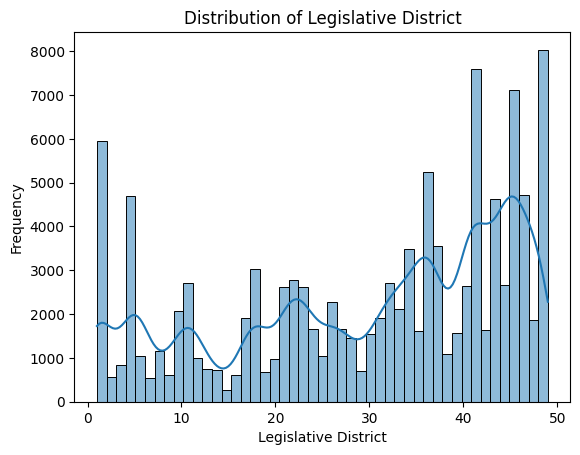

In [ ]:
sns.histplot(x=df.Legislative_District,kde=True)
plt.title('Distribution of Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Frequency')
plt.show()

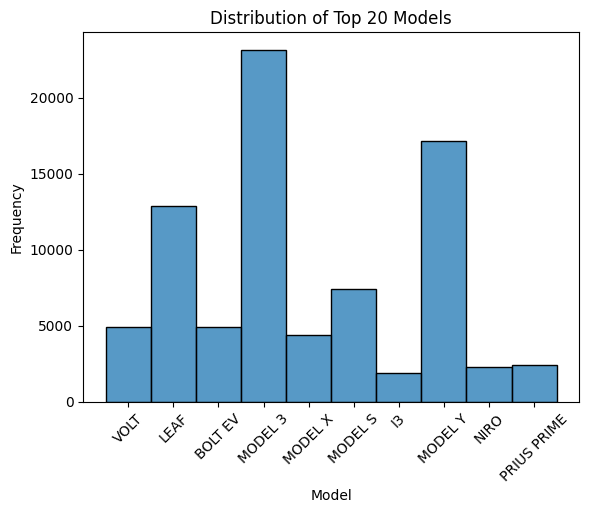

In [ ]:
top_10_models = df['Model'].value_counts().nlargest(10).index
df_10_top = df[df['Model'].isin(top_10_models)]
sns.histplot(x=df_10_top['Model'])
plt.title('Distribution of Top 20 Models')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

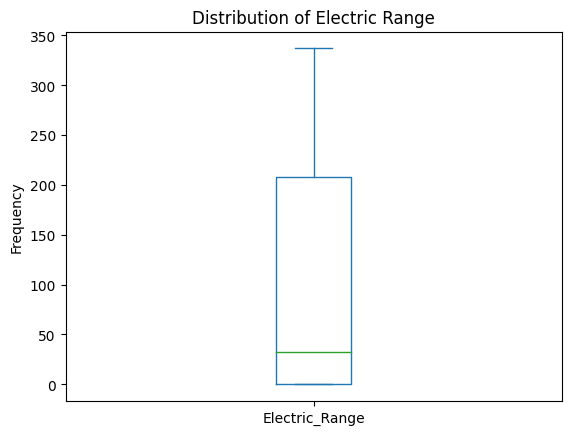

In [ ]:
df['Electric_Range'].plot(kind='box')
plt.title('Distribution of Electric Range')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of Model Year')

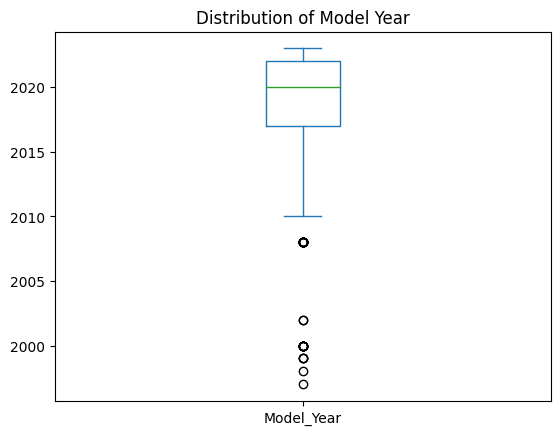

In [ ]:
df['Model_Year'].plot(kind='box')
plt.title('Distribution of Model Year')

Text(0.5, 1.0, 'Distribution of Model Year')

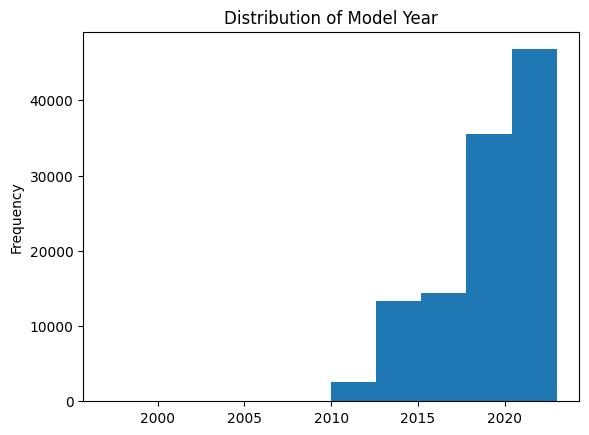

In [ ]:
df['Model_Year'].plot(kind='hist')
plt.title('Distribution of Model Year')

([<matplotlib.patches.Wedge at 0x7c8d9b836d70>,
 [Text(-0.8110908014552326, 0.7430556586115932, 'Battery Electric Vehicle (BEV)'),
  Text(0.8110907318853374, -0.7430557345513914, 'Plug-in Hybrid Electric Vehicle (PHEV)')],
 [Text(-0.44241316443012685, 0.4053030865154144, '76.39%'),
  Text(0.44241312648291126, -0.4053031279371226, '23.61%')])

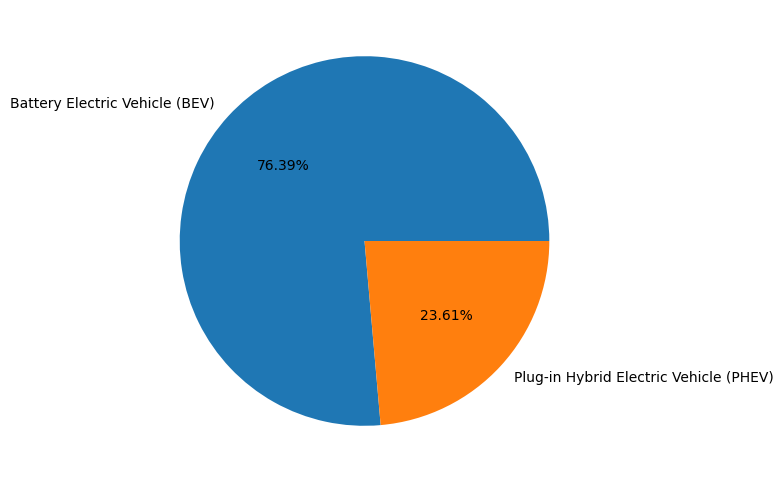

In [ ]:
name=df.Electric_Vehicle_Type.value_counts().index
value=df.Electric_Vehicle_Type.value_counts().values
plt.figure(figsize=(10,6))
plt.pie(value,labels=name,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7c8d9b889870>,
 [Text(-0.11661352530510612, 1.0938013008384637, 'Seattle'),
  Text(-0.84030193106153, -0.7098539741765653, 'Bellevue'),
  Text(-0.036696666828627454, -1.0993877180702305, 'Redmond'),
  Text(0.6613489347459992, -0.8789866816455937, 'Vancouver'),
  Text(1.0517884260741683, -0.3220886629119751, 'Kirkland')],
 [Text(-0.06360737743914878, 0.5966188913664348, '53.38%'),
  Text(-0.4583465078517436, -0.387193076823581, '15.57%'),
  Text(-0.020016363724705884, -0.5996660280383075, '11.04%'),
  Text(0.3607357825887268, -0.4794472808975965, '10.55%'),
  Text(0.5737027778586372, -0.17568472522471368, '9.46%')])

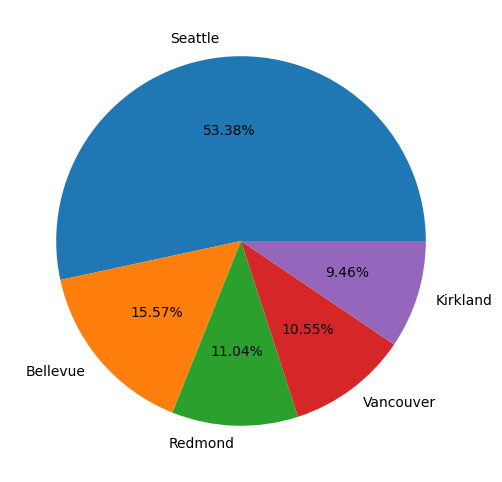

In [ ]:
name=df.City.value_counts().index
value=df.City.value_counts().values
plt.figure(figsize=(10,6))
plt.pie(value[:5],labels=name[:5],autopct='%1.2f%%')

**BIVARIANT ANALYSIS**

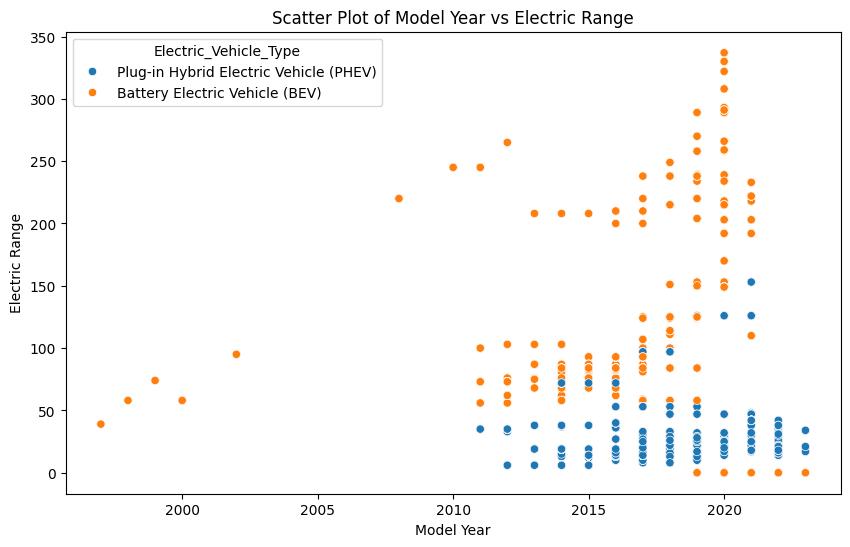

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Model_Year', y='Electric_Range', data=df,hue='Electric_Vehicle_Type')
plt.title('Scatter Plot of Model Year vs Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()

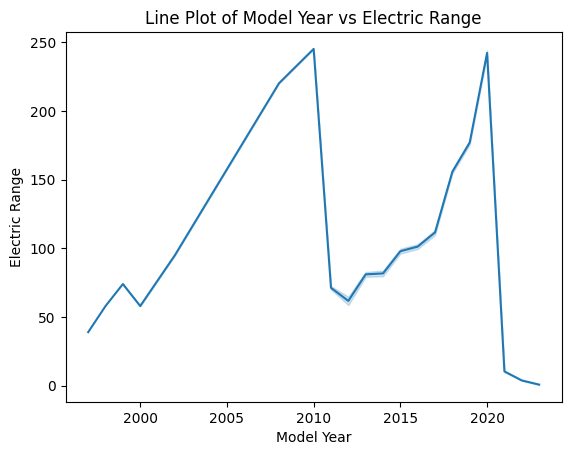

In [ ]:
sns.lineplot(x='Model_Year',y='Electric_Range',data=df)
plt.title('Line Plot of Model Year vs Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


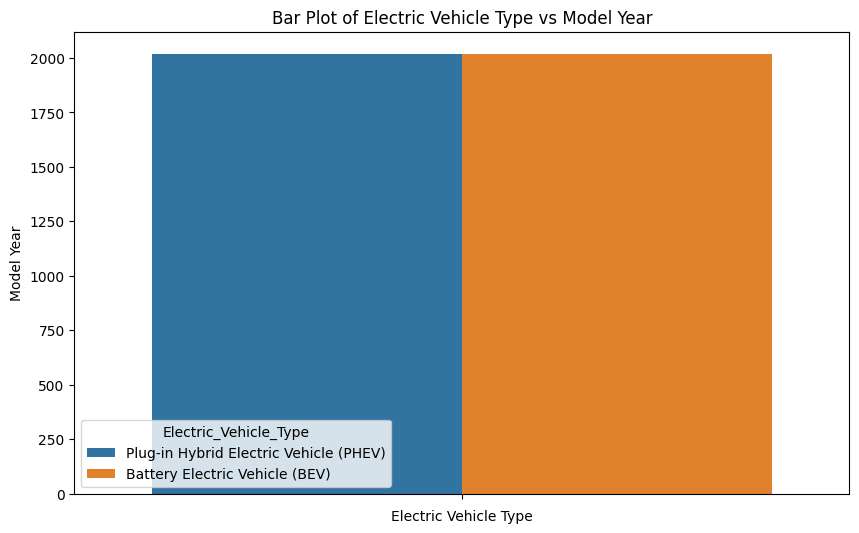

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(hue='Electric_Vehicle_Type',y='Model_Year', data=df)
plt.title('Bar Plot of Electric Vehicle Type vs Model Year')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Model Year')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


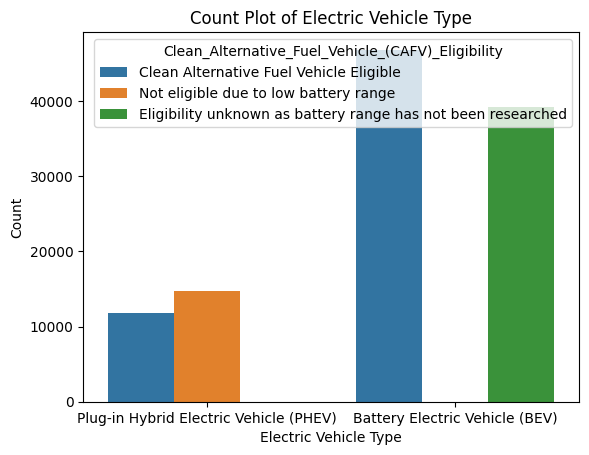

In [ ]:
sns.countplot(x='Electric_Vehicle_Type',hue='Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', data=df)
plt.title('Count Plot of Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.show()

**CHOROPLETH MAP**

In [ ]:
! pip install plotly

In [ ]:
import plotly.express as px
import pandas as pd

state_data = df.groupby('State').size().reset_index(name='Electric Vehicle Count')

fig = px.choropleth(
    state_data,
    locations='State',
    locationmode="USA-states",
    color='Electric Vehicle Count',
    scope="usa",
    color_continuous_scale="Viridis",
    title="Electric Vehicle Distribution by State"
)

fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
    )
)

fig.show()

In [ ]:
!pip install bar-chart-race

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

**RACING BAR PLOT**

In [ ]:
df.head()

,VIN_(1-10),County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,2020_Census_Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,30,198968248,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,30,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [ ]:
import plotly.express as px
ev_make_by_year = df.groupby(['Model_Year', 'Make']).size().reset_index(name='EV Count')

# Step 2: Create a list of all unique makes
unique_makes = df['Make'].unique()

# Step 3: Ensure all makes appear in every year by filling missing combinations
all_years = pd.DataFrame({'Model_Year': sorted(df['Model_Year'].unique())})
all_combinations = all_years.assign(key=1).merge(pd.DataFrame({'Make': unique_makes, 'key':1}), on='key').drop('key', axis=1)
ev_make_by_year_full = all_combinations.merge(ev_make_by_year, on=['Model_Year', 'Make'], how='left').fillna(0)

# Step 4: Convert EV Count to integer (since it was NaN before)
ev_make_by_year_full['EV Count'] = ev_make_by_year_full['EV Count'].astype(int)

# Step 5: Create the animated racing bar plot with increased height
fig = px.bar(
    ev_make_by_year_full,  # Data
    x='EV Count',  # X-axis shows the count of EVs
    y='Make',  # Y-axis shows the car Make
    color='Make',  # Color by car Make
    animation_frame='Model_Year',  # Animation by year
    orientation='h',  # Horizontal bar chart
    title='Electric Vehicle Makes Over the Years',
    labels={'EV Count':'Number of EVs', 'Make':'Car Make'},  # Axis labels
    range_x=[0, ev_make_by_year_full['EV Count'].max() * 1.1],  # Dynamically set x-axis range
    height=800  # Increased height for better visibility
)

# Step 6: Show the plot
fig.show()